In [56]:
import os
import numpy as np
import pandas as pd
import napari
from napari import Viewer
from magicgui import magicgui
from tifffile import imread,imwrite,TiffFile
from skimage.io import imsave
from skimage.io import imread as imread_skimage
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [17]:
df_path = r'D:\data_analysis\Betsy_Suraj\230112_Tcell_analysis\230117_exp_summary.pkl'

In [44]:
df = pd.read_pickle(df_path)

In [49]:
well_array = np.array([f'R{str(x).zfill(3)}' for x in range(8)])
well_array = well_array.reshape(2,4)
well_array

array([['R000', 'R001', 'R002', 'R003'],
       ['R004', 'R005', 'R006', 'R007']], dtype='<U4')

In [50]:
marker_list = list(set(df.marker))
slide_list = list(set(df.slide))

DNA_04
T3737_9_2


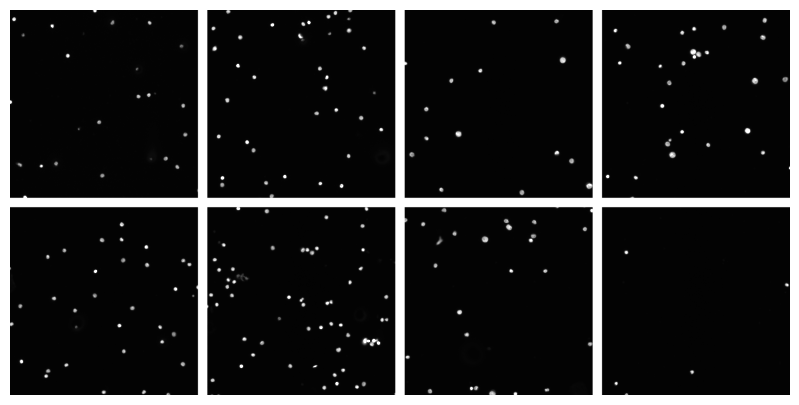

DNA_04
T3937_39


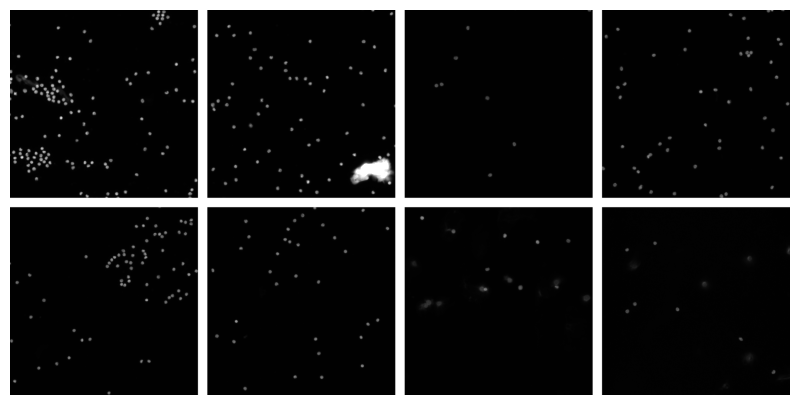

CDK2
T3737_9_2


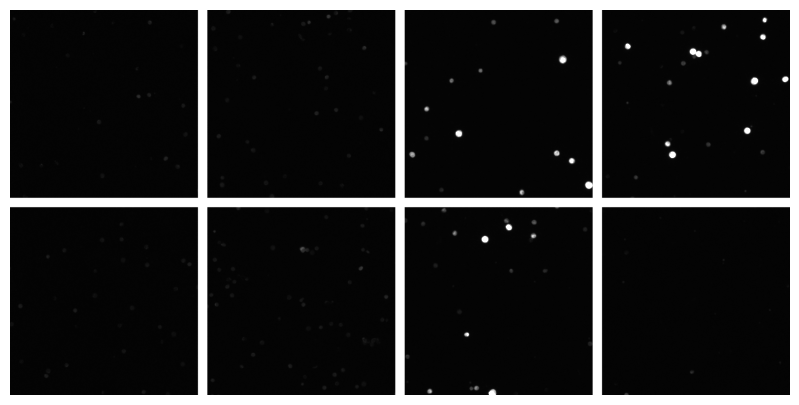

CDK2
T3937_39


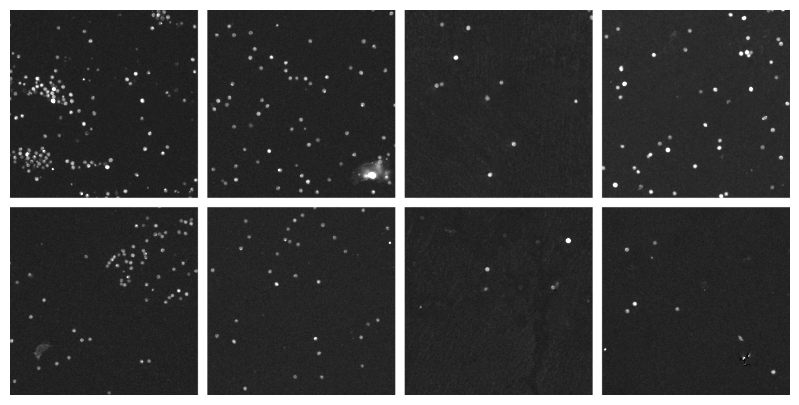

FoxP3
T3737_9_2


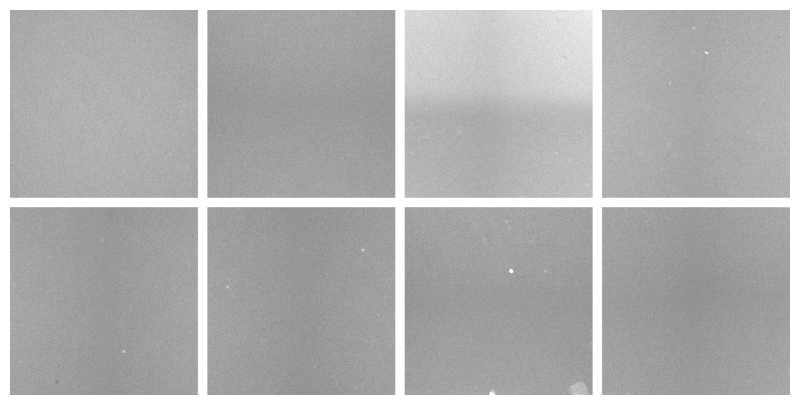

FoxP3
T3937_39


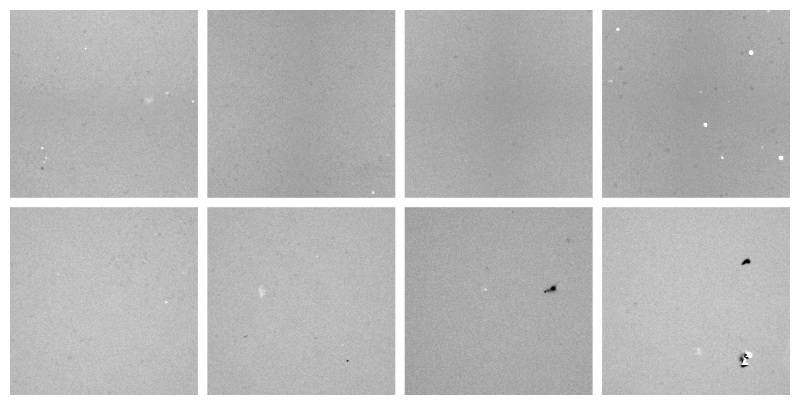

p27
T3737_9_2


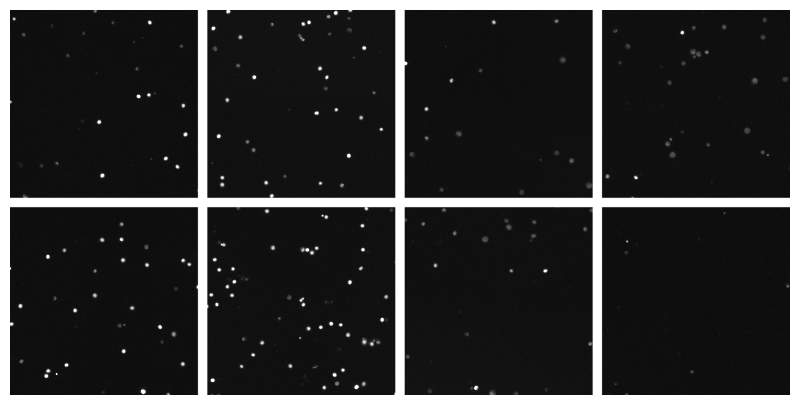

p27
T3937_39


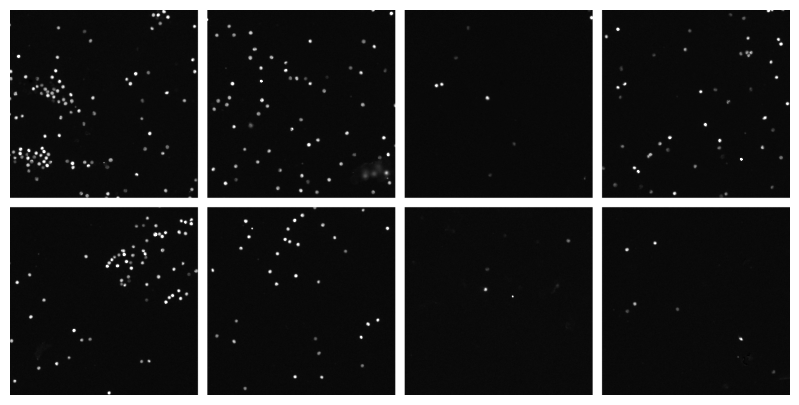

CD44
T3737_9_2


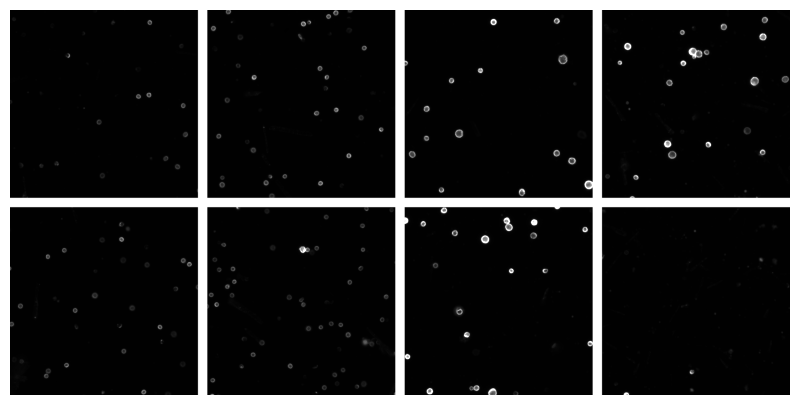

CD44
T3937_39


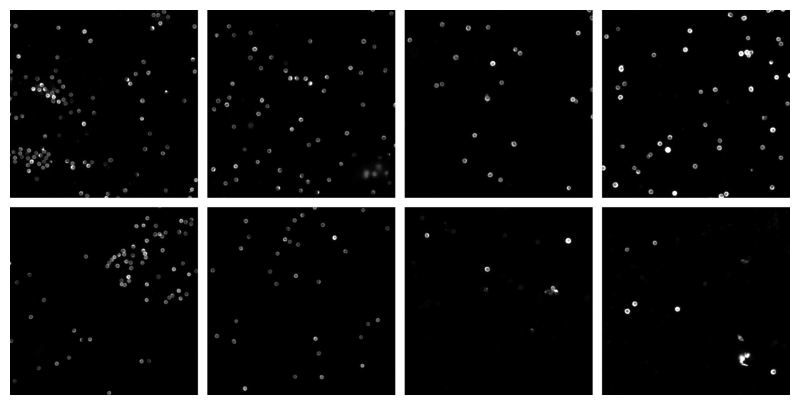

CD69
T3737_9_2


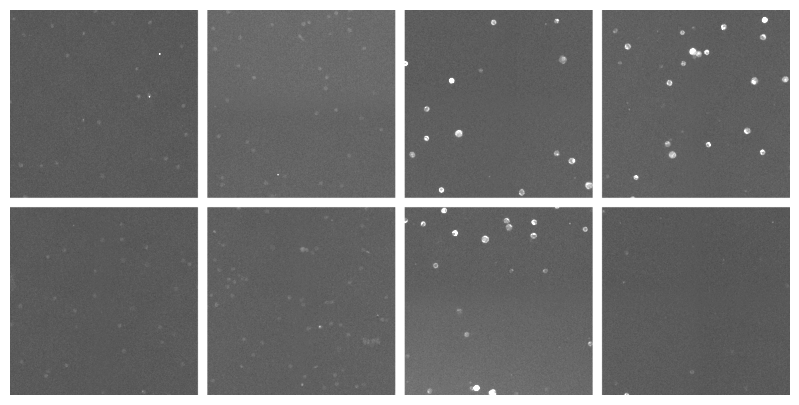

CD69
T3937_39


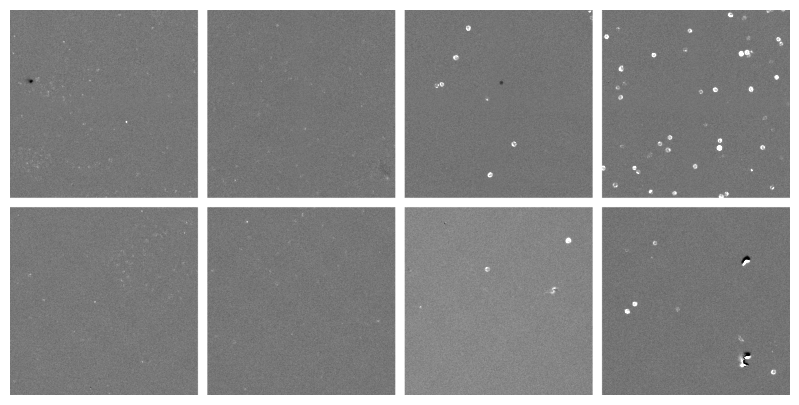

cycB2
T3737_9_2


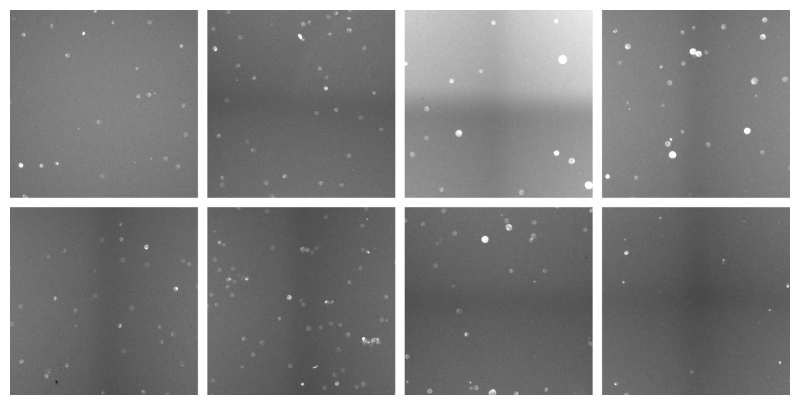

cycB2
T3937_39


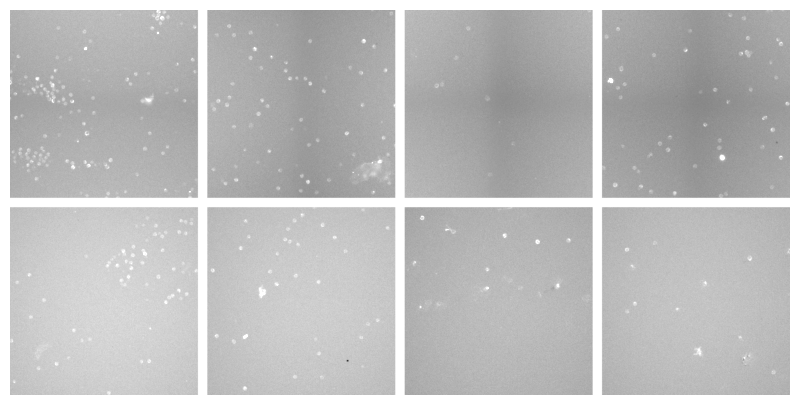

DNA_03
T3737_9_2


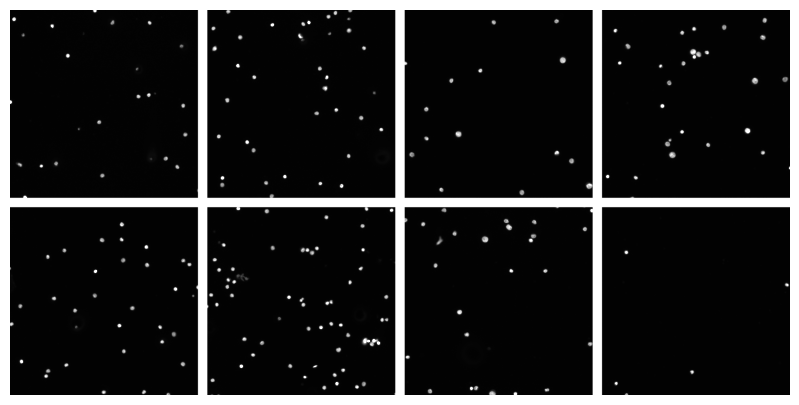

DNA_03
T3937_39


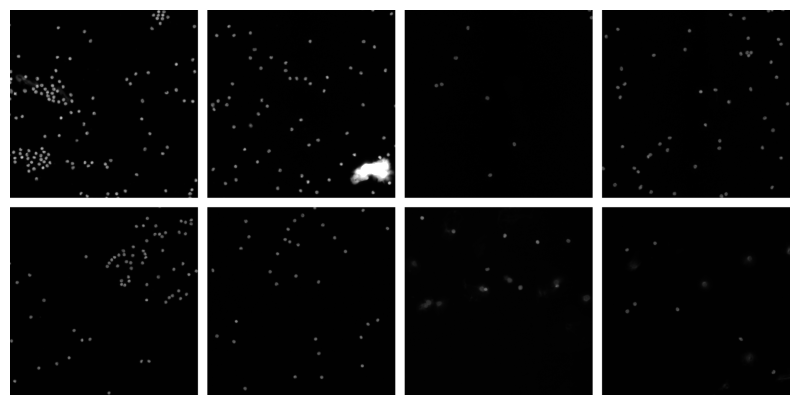

pRB
T3737_9_2


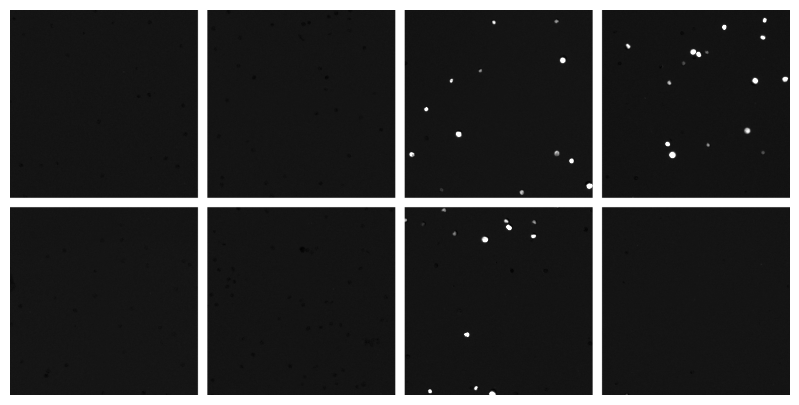

pRB
T3937_39


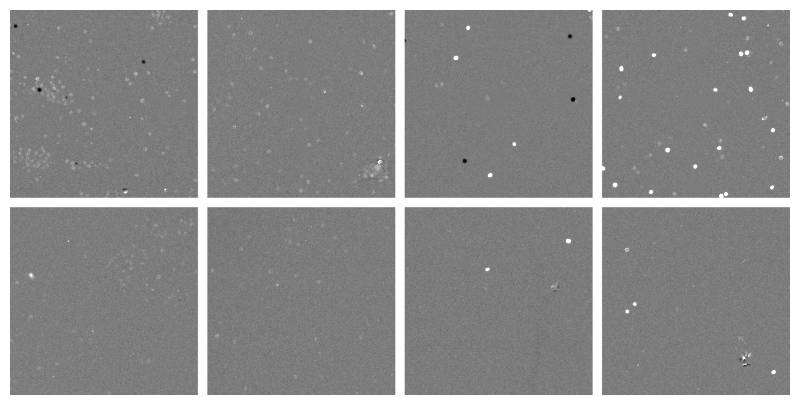

CycB1
T3737_9_2


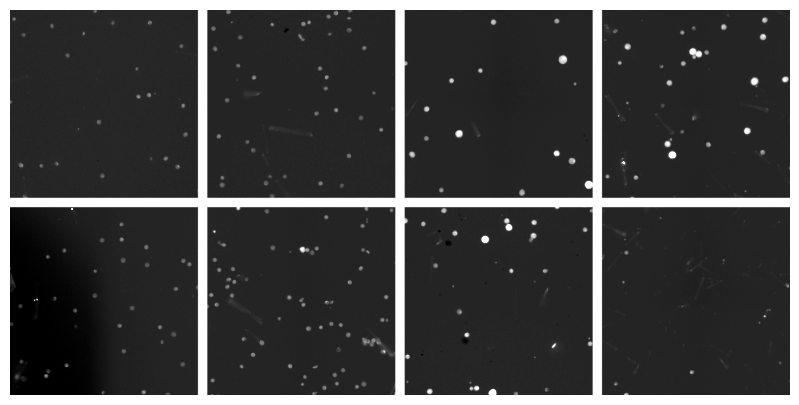

CycB1
T3937_39


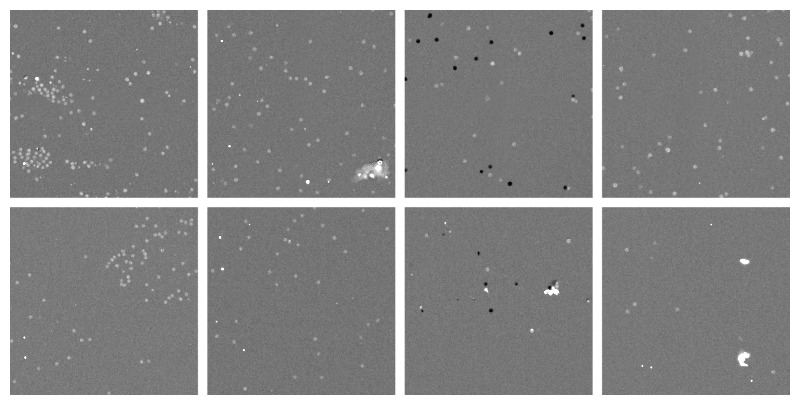

cycA2
T3737_9_2


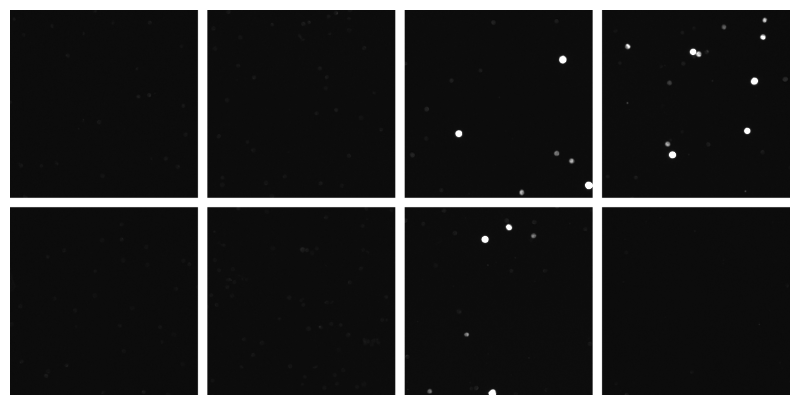

cycA2
T3937_39


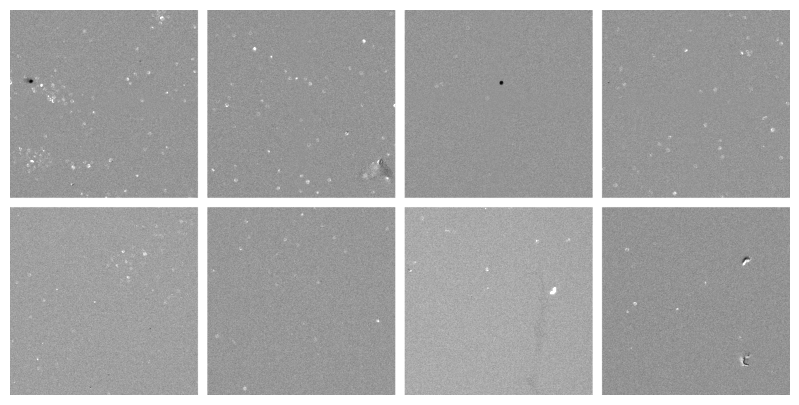

DNA_01
T3737_9_2


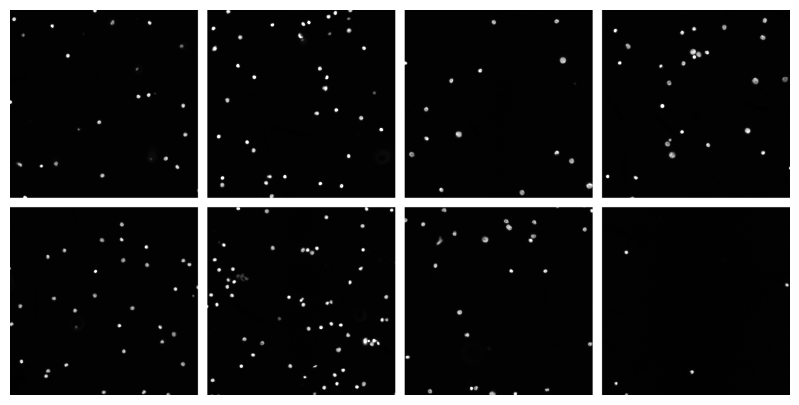

DNA_01
T3937_39


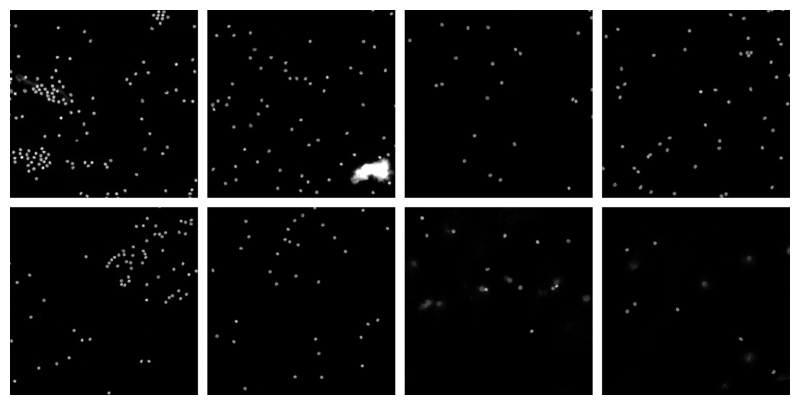

p21
T3737_9_2


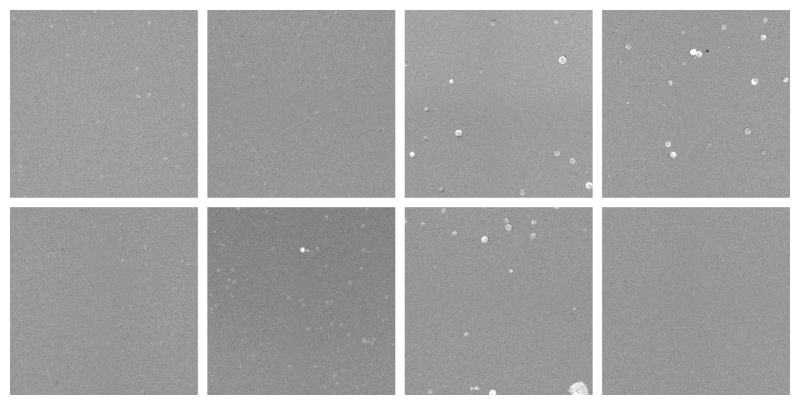

p21
T3937_39


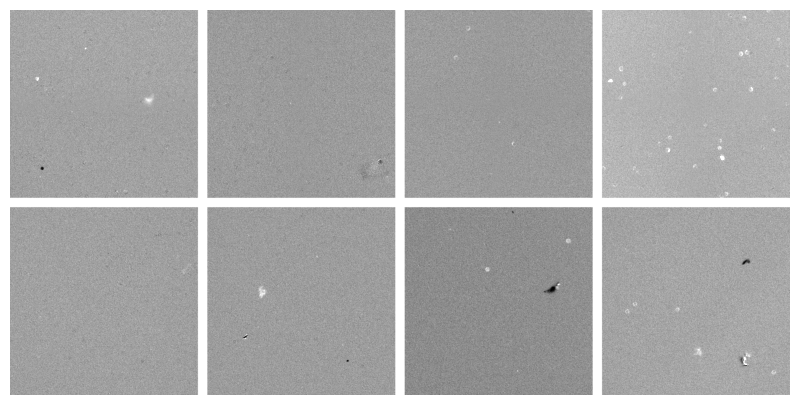

pS6
T3737_9_2


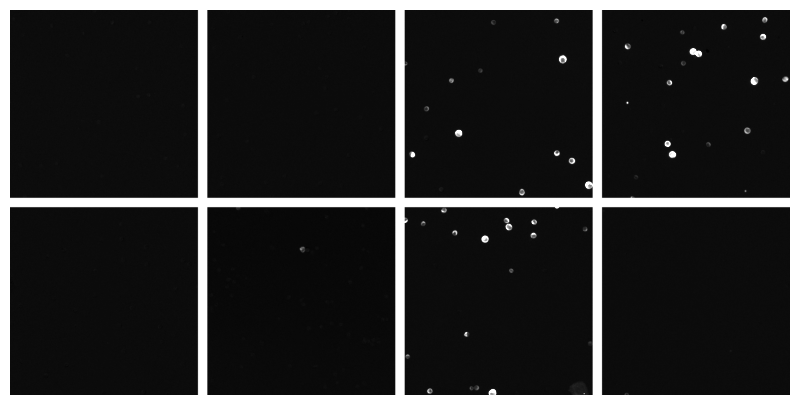

pS6
T3937_39


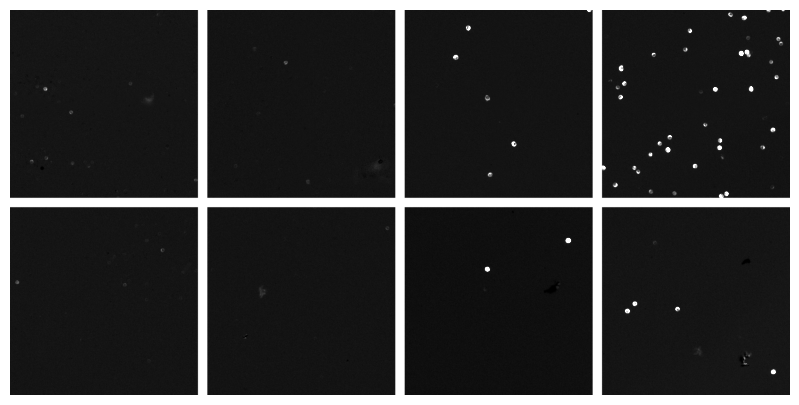

CD4
T3737_9_2


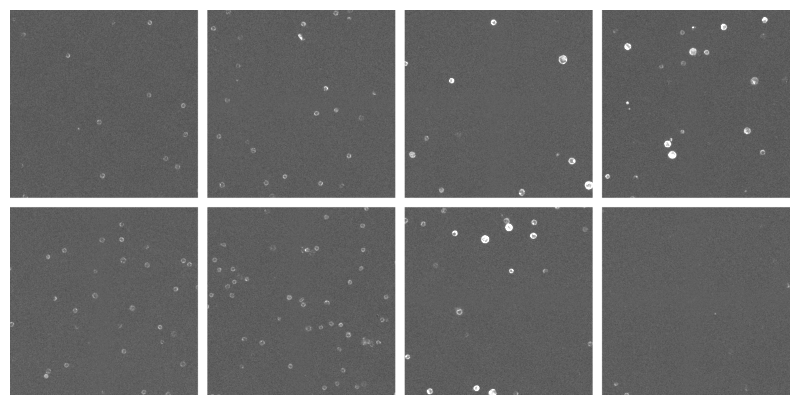

CD4
T3937_39


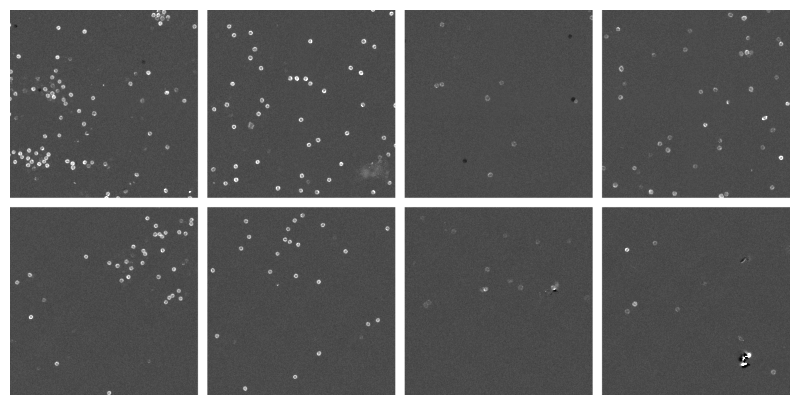

CDC25C
T3737_9_2


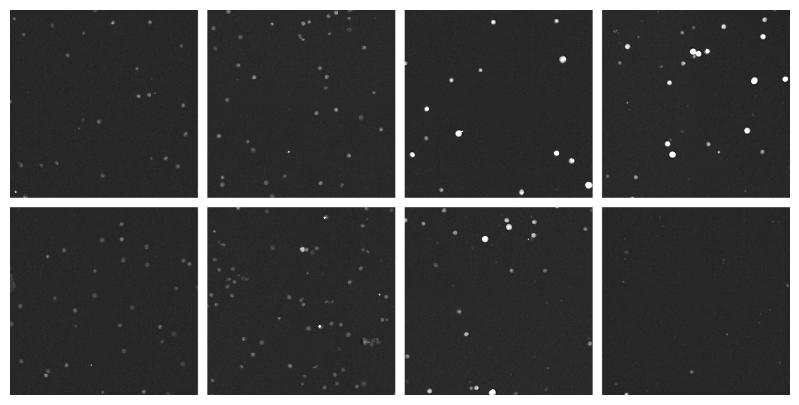

CDC25C
T3937_39


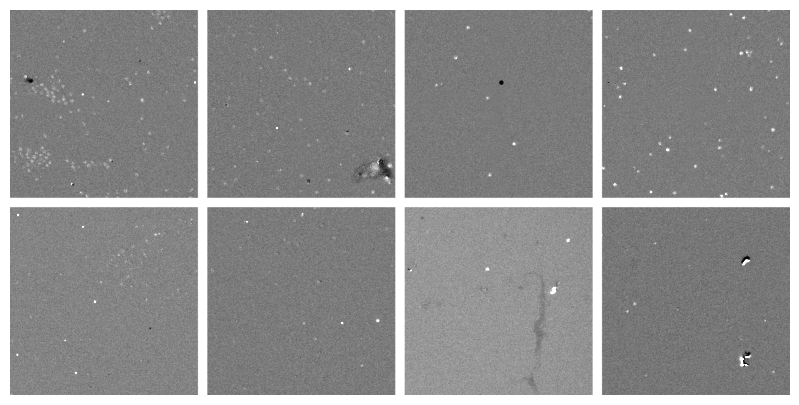

pERK
T3737_9_2


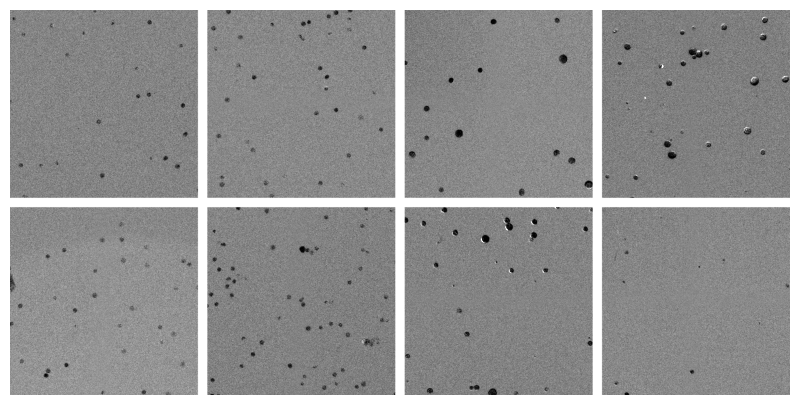

pERK
T3937_39


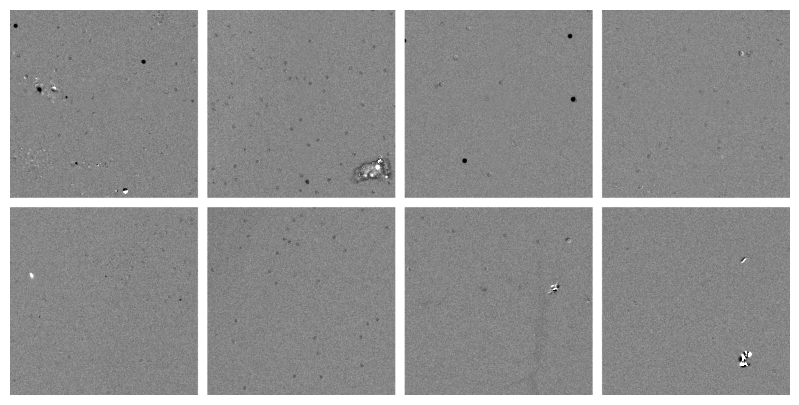

CD8a
T3737_9_2


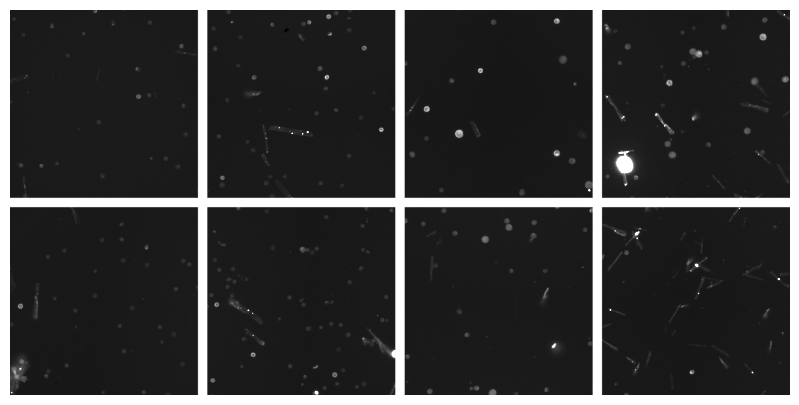

CD8a
T3937_39


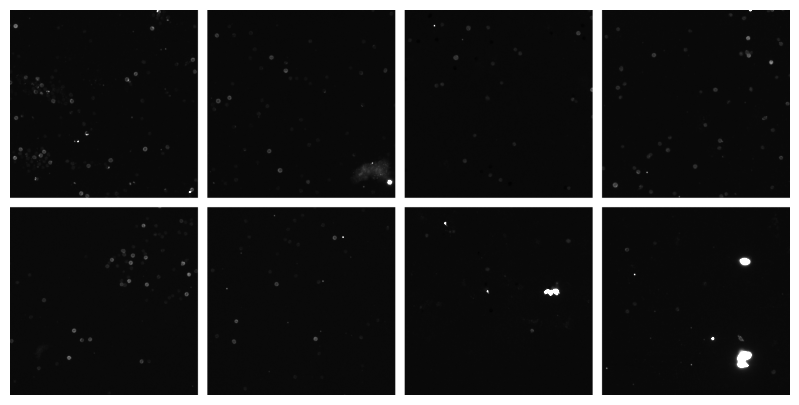

PCNA
T3737_9_2


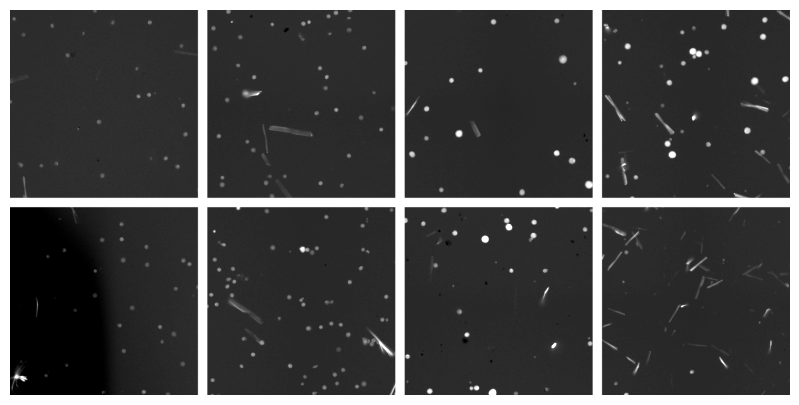

PCNA
T3937_39


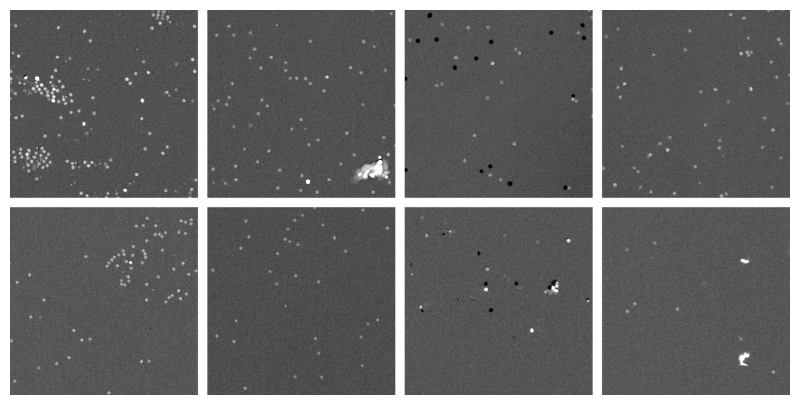

DNA_02
T3737_9_2


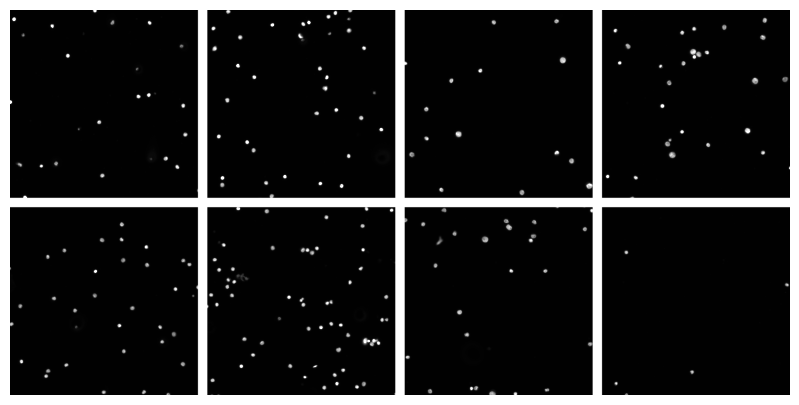

DNA_02
T3937_39


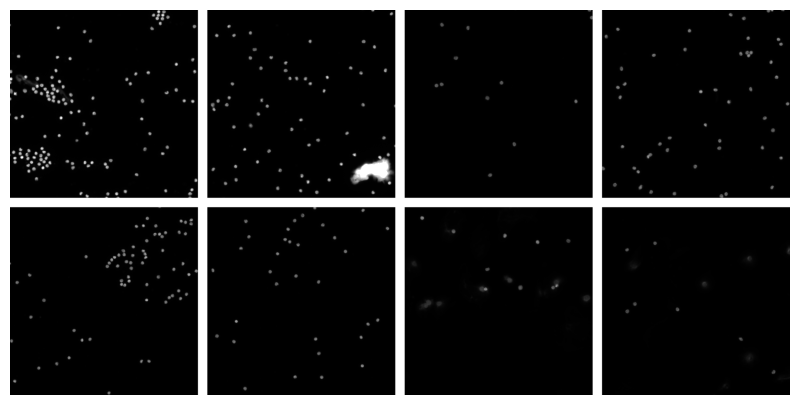

In [59]:
im_size = 1000
frame = 50

for sel_marker in marker_list:

    # select data for a given marker
    df_sel = df.loc[df.marker==sel_marker,:]

    df_sel.loc[:,'im'] = None

    for ind,well in df_sel.iterrows():

        im_path = well.im_path

        im = imread(im_path)

        im_small = im[int(im.shape[0]/2-im_size/2):int(im.shape[0]/2+im_size/2),int(im.shape[1]/2-im_size/2):int(im.shape[1]/2+im_size/2)]

        df_sel.at[ind,'im'] = im_small

    # create the image
    for slide in slide_list:

        print(sel_marker)
        print(slide)

        im = np.ones([im_size*2+frame,im_size*4+frame*3])*(-1)

        df_slide = df_sel.loc[df_sel.slide==slide,:]

        for ind,well in df_slide.iterrows():

            row = np.where(well_array==well.well)[0][0]
            col = np.where(well_array==well.well)[1][0]

            row_start = row*im_size + row*frame
            row_stop = (row+1)*im_size + row*frame
            col_start = col*im_size + col*frame
            col_stop = (col+1)*im_size + col*frame

            im[row_start:row_stop,col_start:col_stop] = well.im

        im_max = np.percentile(im,99.9)
        im[im==-1] = im_max

        fig,ax = plt.subplots(figsize=(15,5))
        plt.imshow(im,vmax=im_max,cmap='gray')
        plt.axis('off')
        plt.show()

In [60]:
!jupyter nbconvert --to webpdf --no-input 01_experiment_overview.ipynb

[NbConvertApp] Converting notebook 01_experiment_overview.ipynb to webpdf
[NbConvertApp] Building PDF
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 6536562 bytes to 01_experiment_overview.pdf
